# Title: Haberman's Survival Data


## Sources:
    (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
    (b) Date: March 4, 1999

## Past Usage:
    Haberman, S. J. (1976). Generalized Residuals for Log-Linear
    Models, Proceedings of the 9th International Biometrics
    Conference, Boston, pp. 104-122.
    Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
    Graphical Models for Assessing Logistic Regression Models (with
    discussion), Journal of the American Statistical Association 79:
    61-83.
    Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
    Department of Statistics, University of Wisconsin, Madison, WI.

## Relevant Information:
    The dataset contains cases from a study that was conducted between
    1958 and 1970 at the University of Chicago's Billings Hospital on
    the survival of patients who had undergone surgery for breast
    cancer.

    Number of Instances: 306

    Number of Attributes: 4 (including the class attribute)

## Attribute Information:
    a. Age of patient at time of operation (numerical)
    b. Patient's year of operation (year - 1900, numerical)
    c. Number of positive axillary nodes detected (numerical)
    d. Survival status (class attribute)
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 year

## Missing Attribute Values: None

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
#Load Iris.csv into a pandas dataFrame.
df = pd.read_csv("haberman.csv")

In [2]:
# (Q) how many data-points and features?
print (df.shape)

(305, 4)


In [3]:
#(Q) What are the column names in our dataset?
df.columns = ['age', 'op_yr', 'axil_nodes', 'survive_status']
print (df.columns)

Index(['age', 'op_yr', 'axil_nodes', 'survive_status'], dtype='object')


In [4]:
#(Q) How many data points for each class are present? 

df["survive_status"].value_counts()
# balanced-dataset vs imbalanced datasets
## Dataset is unbalanced
## 224/81 = 2.76 times higher 

1    224
2     81
Name: survive_status, dtype: int64

In [5]:
df

,age,op_yr,axil_nodes,survive_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


## Objective
To classify which patient will survive atleast 5yrs or not.

    a. Survie 5yrs or more = 1
    b. Died before 5yrs = 2

In [6]:
features = df.columns[:-1]
target = df.columns[-1]

## Univaraite analysis
(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification

[]

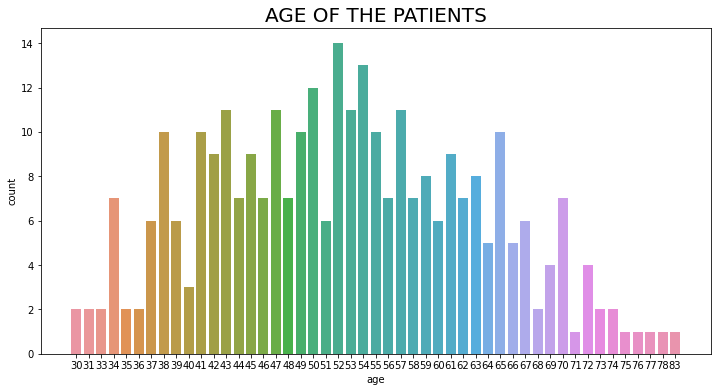

In [7]:
plt.figure(figsize=(12,6))

sns.countplot(x='age',data=df)
plt.title("AGE OF THE PATIENTS",size=20)
plt.plot()

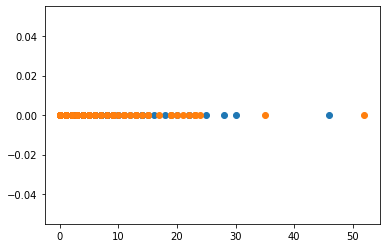

In [8]:
# Univariate Analysis -> Single feature

# What about 1-D scatter plot using just one feature?
#1-D scatter plot
df_survived = df.loc[df["survive_status"] == 1];
df_died = df.loc[df["survive_status"] == 2];

plt.plot(df_survived["axil_nodes"], np.zeros_like(df_survived['axil_nodes']), 'o')
plt.plot(df_died["axil_nodes"], np.zeros_like(df_died['axil_nodes']), 'o')

plt.show()

#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots? Histogram

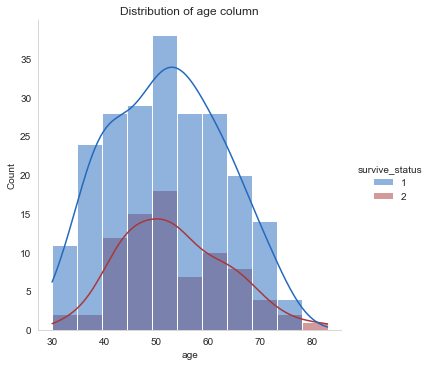

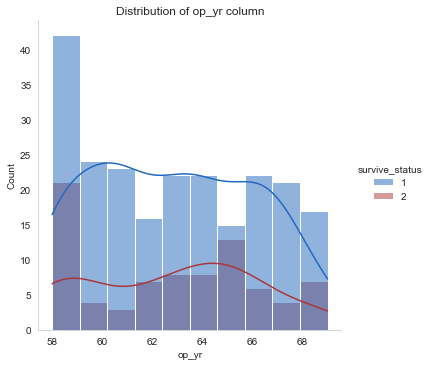

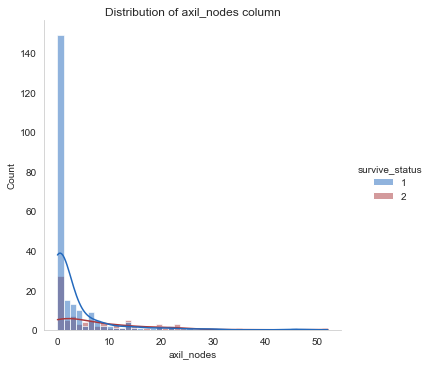

In [9]:
for feature in features:
    sns.set_style("whitegrid")
    sns.displot(data=df, x=feature, kde = True, hue= target, palette='vlag')
    plt.title(f'Distribution of {feature} column')
    plt.grid()
    plt.show()

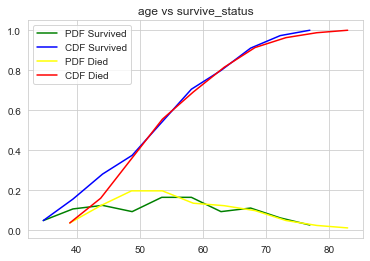

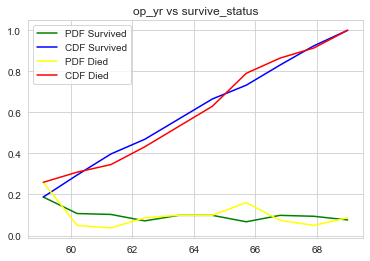

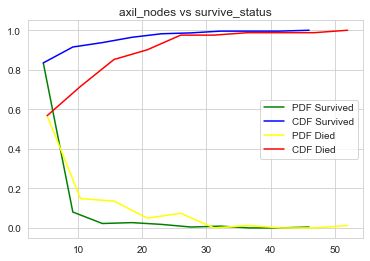

In [10]:
for feature in features:
    # Plots of CDF.

    # Survied
    counts, bin_edges = np.histogram(df_survived[feature], bins=10, 
                                     density = True)
    pdf_survived = counts/(sum(counts))
    cdf_survived = np.cumsum(pdf_survived)
    plt.plot(bin_edges[1:], pdf_survived, color='green', label='PDF Survived')
    plt.plot(bin_edges[1:], cdf_survived, color='blue', label='CDF Survived')
    plot_title = feature + ' vs ' + target 
    plt.title(plot_title)

    # died
    counts, bin_edges = np.histogram(df_died[feature], bins=10, 
                                     density = True)
    pdf_died = counts/(sum(counts))
    cdf_died = np.cumsum(pdf_died)
    plt.plot(bin_edges[1:], pdf_died, color='yellow', label='PDF Died')
    plt.plot(bin_edges[1:], cdf_died, color='red', label='CDF Died')
    plot_title = feature + ' vs ' + target 
    plt.title(plot_title)

    # Red   -> Died
    # Green -> Survived
    plt.legend(loc='best')
    plt.show()

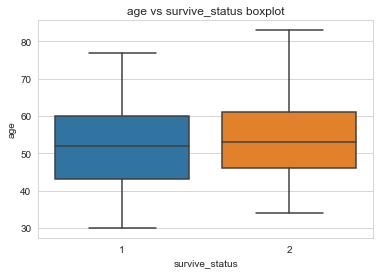

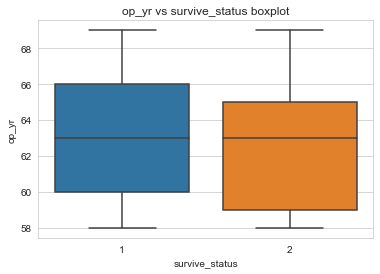

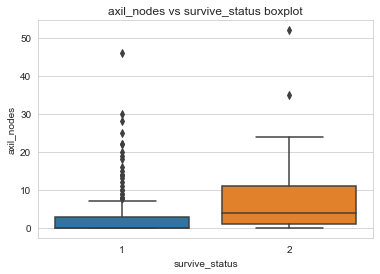

In [11]:
for feature in features:
    sns.boxplot(x=target, y = feature, data= df)
    plot_title = feature + ' vs ' + target + ' boxplot'
    plt.title(plot_title)
    plt.show()

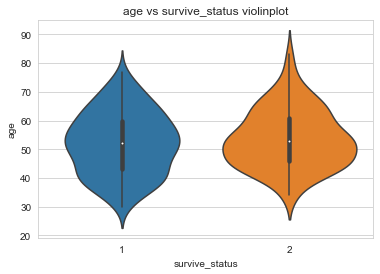

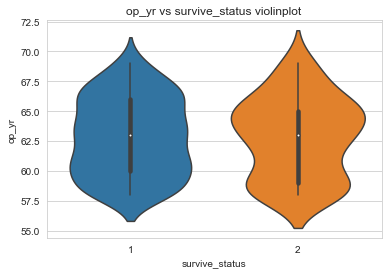

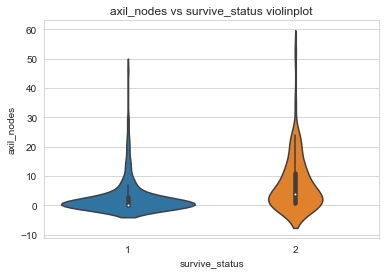

In [12]:
for feature in features:
    sns.violinplot(x=target, y = feature, data= df)
    plot_title = feature + ' vs ' + target + ' violinplot'
    plt.title(plot_title)
    plt.show()

## Bi-variate analysis
(scatter plots, pair-plots) to see if combinations of features are useful in classfication.

c:\users\family\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


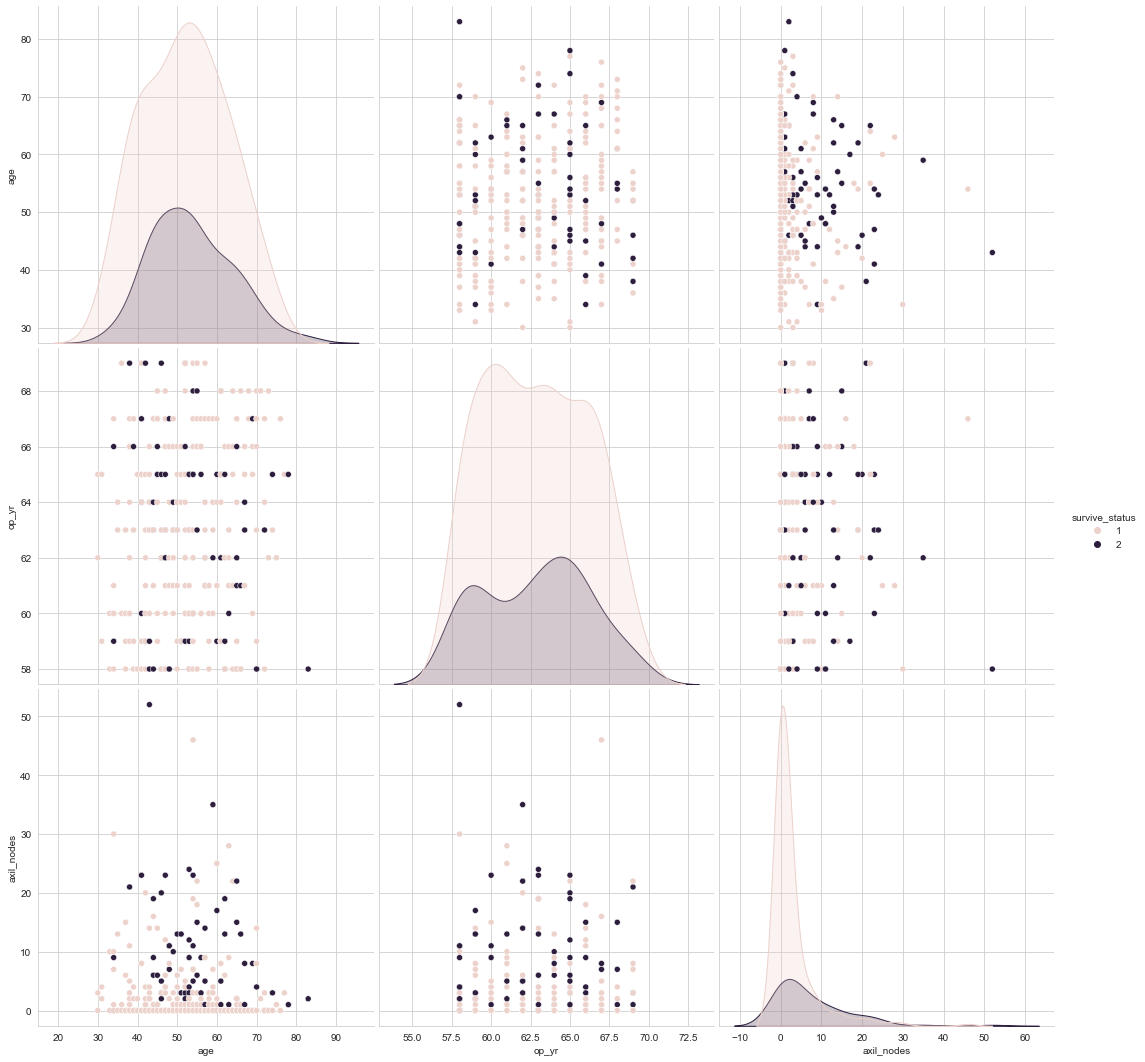

In [13]:
# pairwise scatter plot: Pair-Plot
# How many cobinations exist? 3C2 = 3.
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="survive_status", size=5);
plt.show()

## Multivariate Analysis

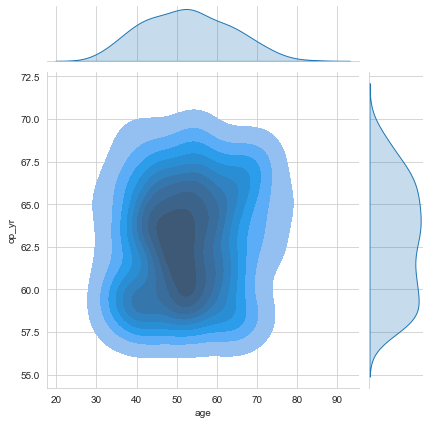

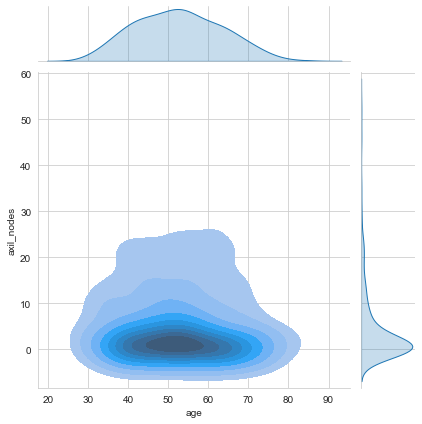

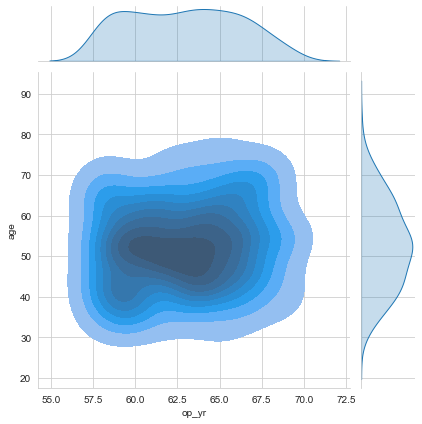

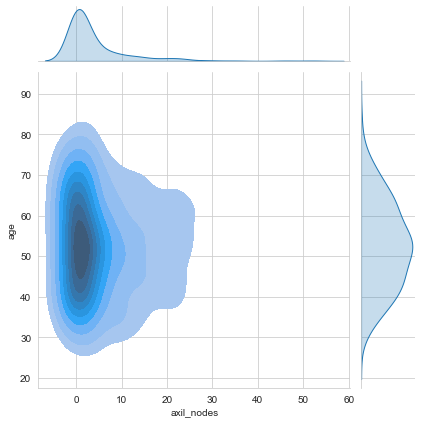

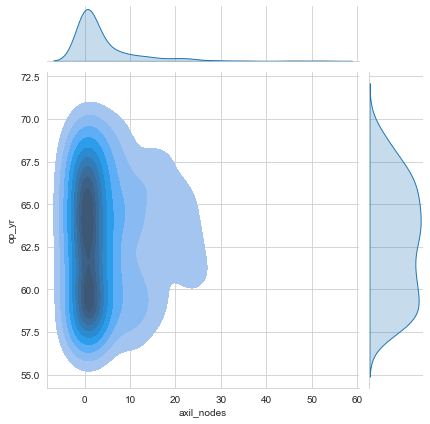

In [14]:
for feature1 in features:
    for feature2 in features:
        if feature1 == 'op_yr' and feature2 == "axil_nodes":
            break
        if feature1 != feature2:
            sns.jointplot(x = feature1, y = feature2, data = df, kind='kde', fill = True)
            plt.show()

## Mean, Variance, Std-dev, Median, Percentile, Quantile, IQR, MAD

In [19]:
# Survived

print("Survived")

## Mean
print("=================\nMeans:")
print(np.mean(df_survived[features]))

## Std-dev
print("=================\nStd-dev:");
print(np.std(df_survived[features]))

## Median
print("=================\nMedians:")
print(np.median(df_survived[features]))

## Quantiles
print("=================\nQuantiles:")
print(np.percentile(df_survived[features],np.arange(0, 100, 25)))

## 90% Quantiles
print("=================\n90th Percentiles:")
print(np.percentile(df_survived[features],90))

## MAD
from statsmodels import robust
print ("=================\nMedian Absolute Deviation")
print(robust.mad(df_survived[features]))

Survived
Means:
age           52.116071
op_yr         62.857143
axil_nodes     2.799107
dtype: float64
Std-dev:
age           10.913005
op_yr          3.222015
axil_nodes     5.869093
dtype: float64
Medians:
52.0
Quantiles:
[ 0.  3. 52. 62.]
90th Percentiles:
66.0
Median Absolute Deviation
[13.34341997  4.44780666  0.        ]


In [20]:
# Died

print("Died")

## Mean
print("=================\nMeans:")
print(np.mean(df_died[features]))

## Std-dev
print("=================\nStd-dev:");
print(np.std(df_died[features]))


## Median
print("=================\nMedians:")
print(np.median(df_died[features]))

## Quantiles
print("=================\nQuantiles:")
print(np.percentile(df_died[features],np.arange(0, 100, 25)))

## 90% Quantiles
print("=================\n90th Percentiles:")
print(np.percentile(df_died[features],90))

## MAD
print ("=================\nMedian Absolute Deviation")
print(robust.mad(df_died[features]))

Died
Means:
age           53.679012
op_yr         62.827160
axil_nodes     7.456790
dtype: float64
Std-dev:
age           10.104182
op_yr          3.321424
axil_nodes     9.128776
dtype: float64
Medians:
53.0
Quantiles:
[ 0.  11.5 53.  63. ]
90th Percentiles:
66.0
Median Absolute Deviation
[11.86081775  4.44780666  5.93040887]


## Conclusoin
1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. There is no clear way to seperate the two classes based on the 3 features.
3. Based on "nodes" we are able to provide a simple 'if-else-=' model to distinguish the 2 classes but it only works for large number of nodes or very small number of nodes.
4. As we can see from the Box plot and Violin plot, the class 1 is more dense in terms of nodes. most of people who survived had 1-10 nodes.
5. On the other hand class 2 is more spread and the dead patients had nodes in a wide range
